# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [137]:
import pandas as pd
import pandas as pd
import scipy
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

#### 1. Is the distribution of body temperatures normal?

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

#### Central Limit Theorem 

The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30. All this is saying is that as you take more samples, especially large ones, your graph of the sample means will look more like a normal distribution.


In [138]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [140]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [141]:
mean = 98.249231
std = 0.733183

In [142]:
sample1 = np.random.normal(mean, std, 100000)
sample2 = np.random.normal(mean, std, 130)

In [143]:
def ecdf(data):
      return np.sort(data), np.arange(1, len(data) + 1) / len(data)

In [144]:
x, y = ecdf(df['temperature'])

In [145]:
x_theor, y_theor = ecdf(sample1)

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
sns.set()

In [148]:
_ = plt.plot(x_theor, y_theor)

In [149]:
_ = plt.plot(x, y, marker='.', linestyle='none')

In [150]:
_ = plt.xlabel('body temperature (fahrenheit)')

In [151]:
plt.ylabel('CDF')

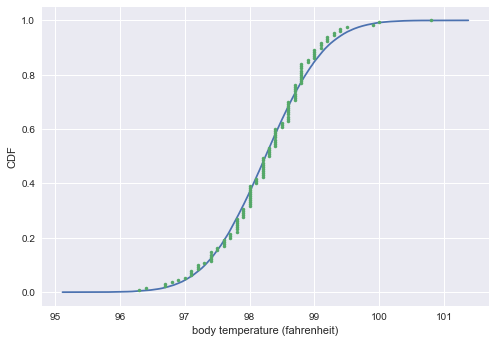

In [152]:
plt.show()

In [153]:
_ = plt.hist(df['temperature'], bins = 12, histtype='step', color='red')
_ = plt.hist(sample2, bins=12, histtype='step', color='blue')

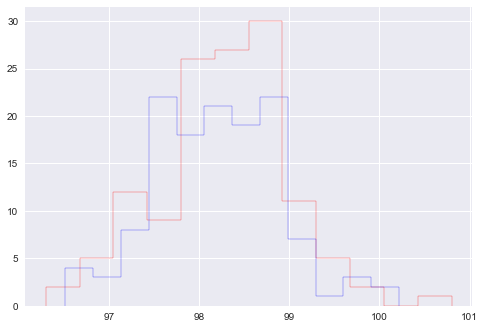

In [154]:
plt.show()

In [155]:
np.sqrt(100000)

316.22776601683796

In [156]:
_ = plt.hist(sample1, bins = 310, histtype='step', color = 'green')

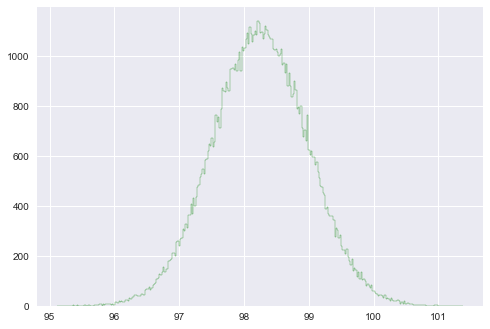

In [157]:
plt.show()

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
body_temp = df['temperature']
sns.distplot(body_temp)

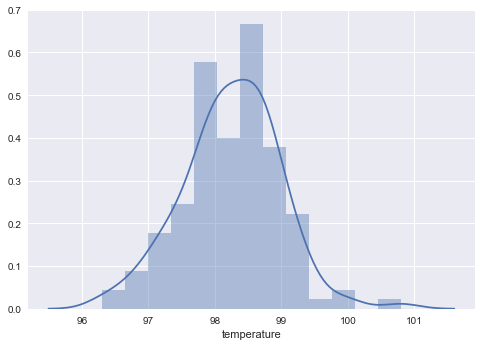

In [159]:
plt.show()

In [160]:
import scipy.stats as stats

In [161]:
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

#### 1: Solution

The data is normally distributed. All four visualizations depict normal distributions and the p value of the normal test is greater then 0.05 which indicates the data has a normal distribution at a significance level of 0.05.

#### 2: Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [162]:
def necc_samp_size(pop, moe, z, std):
    stdev = std
    x = (z**2) * (std) * (1-std)
    y = moe**2
    z = y*pop
    a = x / y
    b = x / z
    nec_samp_size = a / (1 + b)
    print("Necessary sample size: ", '%.0f' % nec_samp_size)

In [163]:
necc_samp_size(1000000000, .05, 1.96, 0.733183)

Necessary sample size:  301


In [164]:
necc_samp_size(1000000000, .1, 1.645, 0.733183)

Necessary sample size:  53


   temperature  heart_rate
0         99.3        68.0
1         98.4        81.0
2         97.8        73.0
3         99.2        66.0
4         98.0        73.0
   temperature  heart_rate
0     0.233504   -0.180048
1     0.033504    0.226202
2    -0.099829   -0.023798
3     0.211282   -0.242548
4    -0.055385   -0.023798


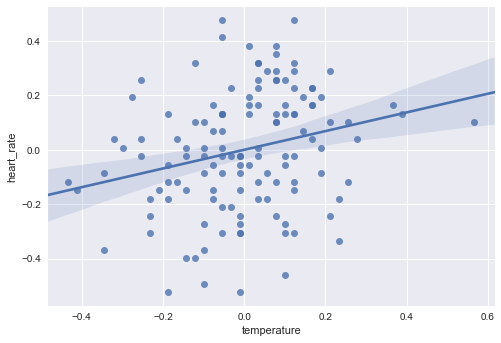

In [165]:
df_th = df[["temperature", "heart_rate"]]
print(df_th.head(5))

df_norm = (df_th - df_th.mean()) / (df_th.max() - df_th.min())
print(df_norm.head(5))

sns.regplot(df_norm['temperature'], df_norm['heart_rate'])
plt.show()

#### 2: Solution

Assuming a population of 1 billion people at a 95% confidence level the neccesary sample size would be 301 people. Our actual sample size was only 130 people. If we reduce the confidence level to 90%, our neccesary sample size becomes 53 which is well below our actual sample size suggesting that at a 90% confidence level our sample size is adequately large. 

The observations are independent, because one persons body temperature does not impact another person's body temperature.

The observations are independent, because the regression plot displays no existance of a trend between body temperature and heart rate. 

In [166]:
necc_samp_size(1000000000, .05, 1.96, .733183)

Necessary sample size:  301


#### 3: Is the true population mean really 98.6 degrees F?

a) Would you use a one-sample or two-sample test? Why?

b) In this situation, is it appropriate to use the  t  or  z  statistic?

c) Now try using the other test. How is the result be different? Why?

#### 3: Solution

a) You would use a one-sample test, because we are testing a single sample of data

b) It is appropriate to use either a t statistic or a z statistic, because although we do not know the population variance the data has greater then 30 observations making a z statistic also acceptable. 

In [167]:
#Null Hypothesis: 98.6 degrees is the true population mean. The population mean is equal to the sample mean. 
#Alt Hypothesis: 98.6 degrees is not the true population mean. The population mean is not equal to the sample mean. 

In [168]:
# T test
t_05_two_tail = 1.97852448
sampMean = 98.249231
popMean = 98.6
sampStd = 0.733183
n = 130

In [169]:
t = (sampMean - popMean) / (sampStd / (np.sqrt(n)))
t

-5.4548208794611863

In [170]:
results = scipy.stats.ttest_1samp(df['temperature'],98.6)
print(results)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [171]:
# P-value lookup from Z value calculator:

# The P-Value is < 0.00001.

#### C)

##### T-Test
The t-test statistic is ~ -5.4759 which is less than the critical t value -1.9785 for an alpha of .05 thus we reject the null hypothesis that 98.6 degrees is the true population mean and accept the alternative that the population mean is not equal equal to 98.6. 

##### Z-Test

The z-test statisitic is also ~ -5.4759. The P-Value associated with this z-statisitic is < 0.00001. Thus at an alpha of .05 we again reject the null hypothesis that 98.6 degrees is the true population mean and accept the alternative that the population mean is not equal equal to 98.6. 

#### 4. Draw a small sample of size 10 from the data and repeat both tests.

a) Which one is the correct one to use?

b) What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [172]:
permuted_data = np.random.permutation(df['temperature'])
permuted_data_10 = permuted_data[10:20]
print(len(permuted_data_10),permuted_data_10)

10 [ 97.7  98.4  98.7  99.   98.5  98.7  98.2  98.8  98.1  98.3]


In [173]:
mean10 = np.mean(permuted_data_10)
std10 = np.std(permuted_data_10)
n10 = 10
print(mean10)
print(std10)

98.44
0.363868107973


In [174]:
t_05_two_tail = 2.262
sampMean10 = mean10
popMean10 = 98.6
sampStd10 = std10

In [175]:
t10 = (sampMean10 - popMean) / (sampStd10 / (np.sqrt(n10)))
t10

-1.3905159989019671

In [176]:
results10 = scipy.stats.ttest_1samp(permuted_data_10,98.6)
results10 = results10
print(results10)

Ttest_1sampResult(statistic=-1.3191593038303229, pvalue=0.21968998449588154)


In [177]:
# Online calculator

#The P-Value is 0.106745.

#The result is not significant at p < 0.05.

In [178]:
#Look up table

#The P-Value is 0.0537 * 2 =
p = 0.0537 * 2
print(p)
#The result is not significant at p < 0.5

0.1074


#### 4: Solution

a) The T test is the correct test to use, because we do not know the variance of the population and the sample size is under 30.

#### b)

#### T-Test

The t-test statistic is -1.6865 which is more than the critical t value of -2.262 for an alpha of .05 thus we fail to reject the null hypothesis that 98.6 degrees is the true population mean.

#### Z-Test

The z-test statisitic is also -1.6865. The P-Value associated with this z-statisitic is 0.1074 so at an alpha of .05 we thus fail to reject the null hypothesis that 98.6 degrees is the true population mean.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

Start by computing the margin of error and confidence interval.

In [179]:
CI_low, CI_high = stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())
CI_low, CI_high

(96.812218185403111, 99.686243353058444)

In [180]:
# Z test confidence interval
z90 = 1.645
z95 = 1.96
z99 = 2.576

sampStd = 0.733183
sampMean = 98.249231

marginoferror = z95 * sampStd

lower = sampMean - marginoferror
upper = sampMean + marginoferror

print('margin of error is: ', marginoferror)
print("95% confidence interval: ", lower, ", ", upper)

margin of error is:  1.4370386800000001
95% confidence interval:  96.81219232 ,  99.68626968


In [181]:
# T test confidence interval

marginoferrorT = 5.4759 * (sampStd/np.sqrt(130))

upperT = sampMean + marginoferrorT
lowerT = sampMean - marginoferrorT

print('margin of error is: ', marginoferrorT)
print("95% confidence interval: ", lowerT, ", ", upperT)


margin of error is:  0.352124480262
95% confidence interval:  97.8971065197 ,  98.6013554803


##### 5: Solution

Calculated the confidence interval using the Z statistic and using the T statistic

For a Z Stat the margin of error is 0.1260 and the confidence interval with 95% conifidence is (96.8122 ,  99.6863)

For a T Stat the margin of error is 0.3521 and the confidnce interval with 95% confidence is ( 97.8971,  98.6014)

Assuming a normal distribution we would consider a temperature of 96.8122 F abnormally low and a temperature of 99.6863 F abnormally high.

Assuming a t distribution we would consider a temperature of 97.8971 F abnormally low and a temperature of 98.6014 F abnormally high.

#### 6. Is there a significant difference between males and females in normal temperature?

a) What test did you use and why?

b) Write a story with your conclusion in the context of the original problem.

In [182]:
# Null Hypothesis: The difference between males average temperature and females average temperature is 0
# Alternative Hypothesis: The difference between males average temperature and females average temperature is not 0

In [183]:
males = df[df['gender'] == 'M']

males = males['temperature']
females = df[df['gender'] == 'F']
females = females['temperature']
male = males.as_matrix()
female = females.as_matrix()
difference = female - male

In [184]:
diffMean = np.mean(difference)
diffStd = np.std(difference)
stdM = np.std(male)
stdF = np.std(female)
ste = diffStd / (np.sqrt(65))
print("Mean differences is: ", diffMean, "Standard deviation of differences is: ", diffStd, 
     "standard error of differences is: ", ste)

Mean differences is:  0.289230769231 Standard deviation of differences is:  1.03226756772 standard error of differences is:  0.128037033787


In [185]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [188]:
t1 = diffMean / np.sqrt(((stdM**2)/65)+((stdF**2)/65))
t1

2.3032202891943552

In [187]:
t = (diffMean - 0) / ste
t

2.2589618071927862

#### 6 Solution

a) Two sample T test

b) The t statisitic is 2.3 which falls outside the acceptance region of -2.045 to 2.045, thus we reject the null hypothesis and accept the alternate hypothesis that the mean difference of male and female body temperature is different with a significance of level of 0.05.